<a href="https://colab.research.google.com/github/eliassalazarb/FisicaComputacional1/blob/main/Actividad10/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#**Ejercicio 1**

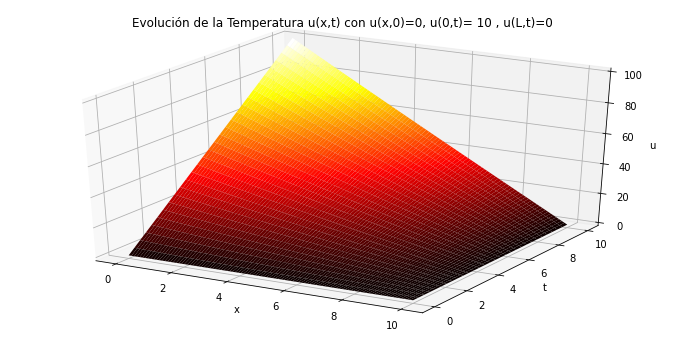

In [ ]:
# VAMOS A SOLUCIONAR LA ECUACION DEL CALOR CON scipy.integrate.odeint
# PROBLEMA DE VALOR INICIAL Y CONDICIONES A LA FRONTERA TIPO DE Dirichlet

# DEFINIMOS LA EXPRESIÓN DE DIFERENCIAS FINITAS CENTRADAS DE SEGUNDO ORDEN
def odefunc1(u, t):
    dudt1 = np.zeros(x0.shape)

    # CONDICIONES A LA FRONTERA TOPO Dirichlet: "TEMPERATURA CONSTANTE"
    # Condiciones a la frontera u(0,t)= 10  ,   u(L,t)= 0  
    dudt1[0] = 10
    dudt1[-1] = 0

    # CONSTANTE DIFICIÓN DE CALOR
    kappa = 100
   
    # CALCULAMOS LA TEMPERATURA DE LOS PUNTOS INTERIORES 1 A N-1
    for i in range(1, N-1):
        dudt1[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt1

############################  PARAMETROS A DEFINIR #############################
# INTERVALO EN x = L
a = 0
b = 10

# TIEMPO INICIAL Y FINAL
t0 = 0
tf = 10.0

# NÚMERO DE PUNTOS EN DIRECCIÓN DE X
N = 100

# DELTA X
h = (b-a)/(N-1)

# LOS PUNTOS EN EL DOMINIO DE X
x = np.linspace(a, b, N);

# CONDICIÓN INICIAL (TEMPERATURA DENTRO DE LA BARRA) u(x,0)= 0
x0 = 0*x
x0[x0 < 0] = 0

# PUNTOS DE INTEGRACIÓN EN EL TIEMPO
tspan = np.linspace(t0, tf, 30);

# SOLUCIÓN USANDO scipy.integrate.odeint
sol = odeint(odefunc1, x0, tspan)

# CREANDO FIGURA EN 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=0, u(0,t)= 10 , u(L,t)=0')
plt.show()

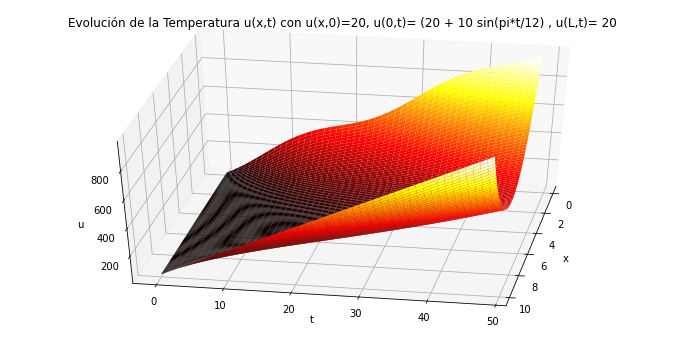

In [ ]:
# VAMOS A SOLUCIONAR LA ECUACION DEL CALOR CON scipy.integrate.odeint
# PROBLEMA DE VALOR INICIAL Y CONDICIONES A LA FRONTERA TIPO DE Dirichlet

# DEFINIMOS LA EXPRESIÓN DE DIFERENCIAS FINITAS CENTRADAS DE SEGUNDO ORDEN

def odefunc2(u, t):
    dudt2 = np.zeros(x0.shape)

    # CONDICIONES A LA FRONTERA TOPO Dirichlet: "TEMPERATURA CONSTANTE"
    # Condiciones a la frontera u(0,t)= (20 + 10 sin(pi*t/12) ,   u(L,t)= 20 
    dudt2[0] = 20 + (10*np.sin(np.pi*t/12))
    dudt2[-1] = 20

    # CONSTANTE DIFICIÓN DE CALOR
    kappa = 0.25
   
    # CALCULAMOS LA TEMPERATURA DE LOS PUNTOS INTERIORES 1 A N-1
    for i in range(1, N-1):
        dudt2[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt2

############################  PARAMETROS A DEFINIR #############################
# INTERVALO EN x = L
a = 0
b = 10

# TIEMPO INICIAL Y FINAL
t0 = 0
tf = 48.0

# NÚMERO DE PUNTOS EN DIRECCIÓN DE X
N = 100

# DELTA X
h = (b-a)/(N-1)

# LOS PUNTOS EN EL DOMINIO DE X
x = np.linspace(a, b, N);

# CONDICIÓN INICIAL (TEMPERATURA DENTRO DE LA BARRA) u(x,0)= 20
x0 = 0*x+20
x0[x0 < 0] = 0

# PUNTOS DE INTEGRACIÓN EN EL TIEMPO
tspan = np.linspace(t0, tf, 50);

# SOLUCIÓN USANDO scipy.integrate.odeint
sol2 = odeint(odefunc2, x0, tspan)

# CREANDO FIGURA EN 3D
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
ax.plot_surface(SX, ST, sol2, cmap='hot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=40, azim=10)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=20, u(0,t)= (20 + 10 sin(pi*t/12) , u(L,t)= 20')
plt.show()

dt/dx**2 < 0.5? 0.002


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'


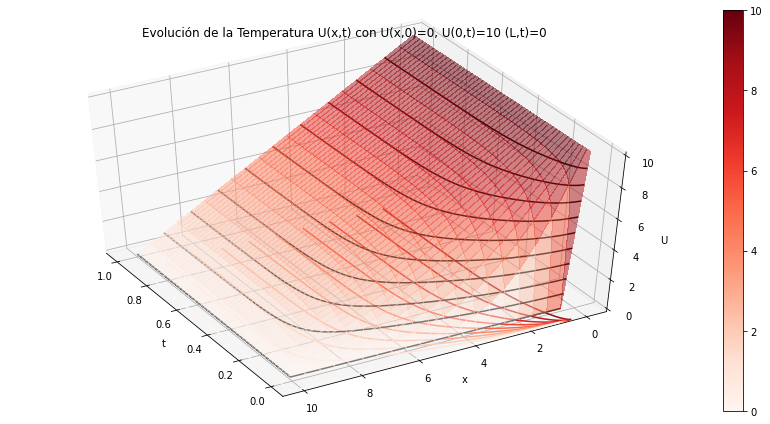

In [ ]:
#PASOS EN x y t RESPECTIVAMENTE
M=21 
N=2001

#PUNTOS DE LA BARRA INCIAL Y FINAL
x0=0
xL=10 

#TIEMPO DE INTEGRACION
t0=0
tf=1.0

dx= (xL - x0) / (M - 1) # TAMAÑO EN X
dt = (tf - t0) / (N - 1) # TAMAÑO EN t
print('dt/dx**2 < 0.5?', dt/dx**2)
kappa=100.0
alpha=(kappa*dt)/(dx**2)

# MALLA (x,t)
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)
U = np.zeros((M, N))

#CONDICION INICIAL Y DE FRONTERA
U[:,0] = np.zeros(xspan.shape)
U[0, :] = 10
U[-1, :] = 0.0

for k in range(0, N-1): # AVANCE EN EL TIEMPO
    for i in range(1, M-1): # CALCULA LA TEMPERATURA EN TODO EL DOMINIO DE X
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

#GRAFICA DE LA FUNCIÓN
T, X = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)


ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

m = plt.cm.ScalarMappable(cmap='Reds')

m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10 (L,t)=0') 

ax.view_init(elev=45, azim=150)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 0.096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'


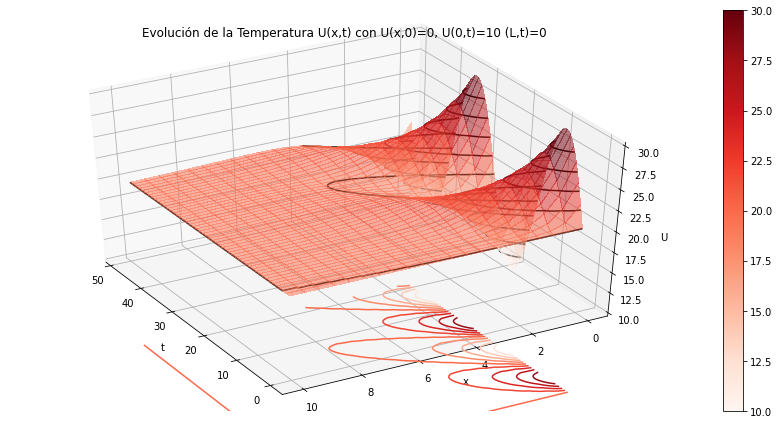

In [ ]:
# PASOS EN x y t RESPECTIVAMENTE
M=21
N=2001

#PUNTOS DE LA BARRA INCIAL Y FINAL
x0=0
xL=10 

#TIEMPO DE INTEGRACION
t0=0
tf=48.00

dx= (xL - x0) / (M - 1) # TAMAÑO EN X
dt = (tf - t0) / (N - 1) # TAMAÑO EN t
print('dt/dx**2 < 0.5?', dt/dx**2)
kappa=0.25 

alpha=(kappa*dt)/(dx**2)

#MALLA (x,t)
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)

U = np.zeros((M, N))

#CONDICION INICIAL Y DE LA FRONTERA
U[:,0] = np.zeros(xspan.shape)+20
U[0, :] =20 + 10*np.sin(np.pi*tspan/(12))
U[-1, :] = 20.0

for k in range(0, N-1): # AVANCE EN EL TIEMPO
    for i in range(1, M-1): # CALCULA LA TEMPERATURA EN TODO EL DOMINIO DE X
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]


# GRAFICACION DE LA SUPERFICIE
T, X = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(12,6))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',linewidth=0.01, antialiased=False,alpha=0.5)

ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=-1)

m = plt.cm.ScalarMappable(cmap='Reds')

m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) con U(x,0)=0, U(0,t)=10 (L,t)=0')
 
ax.view_init(elev=40, azim=150)

plt.tight_layout()
plt.show()

dt/dx**2 < 0.5? 46.08


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'lw'


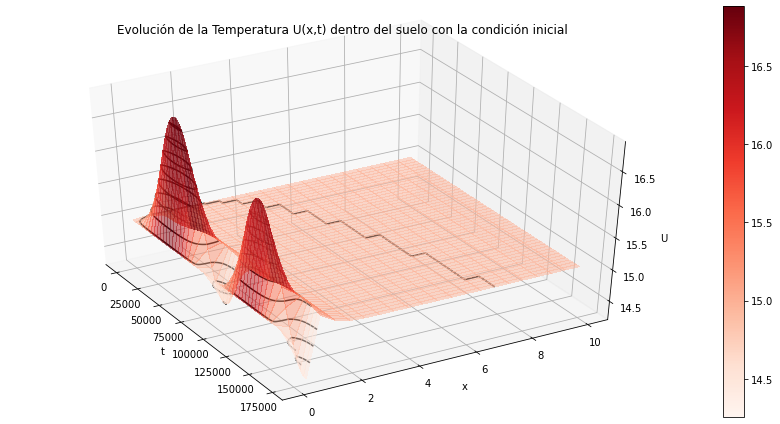

In [ ]:
# PASOS EN x y t RESPECTIVAMENTE
M = 21
N = 15001

x0 = 0
xL = 10 # PROFUNDIDAD A LA QUE NO CAMBIARA

#TIEMPO INICIAL Y FINAL EN SEGUNDOS
t0 = 0
tf = 172800 

dx = (xL-x0) / (M-1) # TAMAÑO DE x
dt = (tf-t0) / (N-1) # TAMAÑO DE t
print('dt/dx**2 < 0.5?', dt/dx**2)

kappa = 1*10**(-6) 

alpha = kappa * dt / dx**2 

# MALLA (x,t) 
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tf, N)
U = np.zeros((M, N))

# CONDICION INICIAL
#TEMPERATURA INICIAL DE LA TIERRA DE 20°C
U[:,0] = 15.0*np.ones(xspan.shape)

# METODO DE DIFERENCIAS FINITAS PARA LA ECUACION DEL CALOR 
for k in range(0, N-1):
    t=k*dt
    U[0, :] = 15 + 20*np.sin(2*np.pi*t/86400)
    U[-1, :] = 15
    for i in range(1, M-1): # CALCULA LA TEMPERATURA EN TODO EL DOMINIO DE X
        U[i, k+1] = alpha * U[i-1, k] + (1 - 2 * alpha) * U[i, k] + alpha * U[i + 1, k]

# GRAFICA DE LA SUPERFICIE
T, X = np.meshgrid(tspan, xspan)
fig = plt.figure(figsize=(12,6))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(T, X, U, cmap='Reds',
                       linewidth=0.01, antialiased=False, alpha=0.5)

ax.contour(T, X, U, 10, lw=1, colors="k", linestyles="solid")
ax.contour(T, X, U, 10, lw=1, cmap="Reds", linestyles="solid", offset=10)

m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(U)
plt.colorbar(m)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('U')
ax.set_title('Evolución de la Temperatura U(x,t) dentro del suelo con la condición inicial ')

ax.view_init(elev=40, azim=-30)

plt.tight_layout()
plt.show()